In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [140]:
df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [141]:
df.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
d

In [142]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [149]:
#Since We dont have any missing value so no need to handle thatb


In [151]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [153]:
columns = ['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar']

num_columns = len(columns)
ncols = 6
n_rows = (num_columns + ncols - 1) // ncols

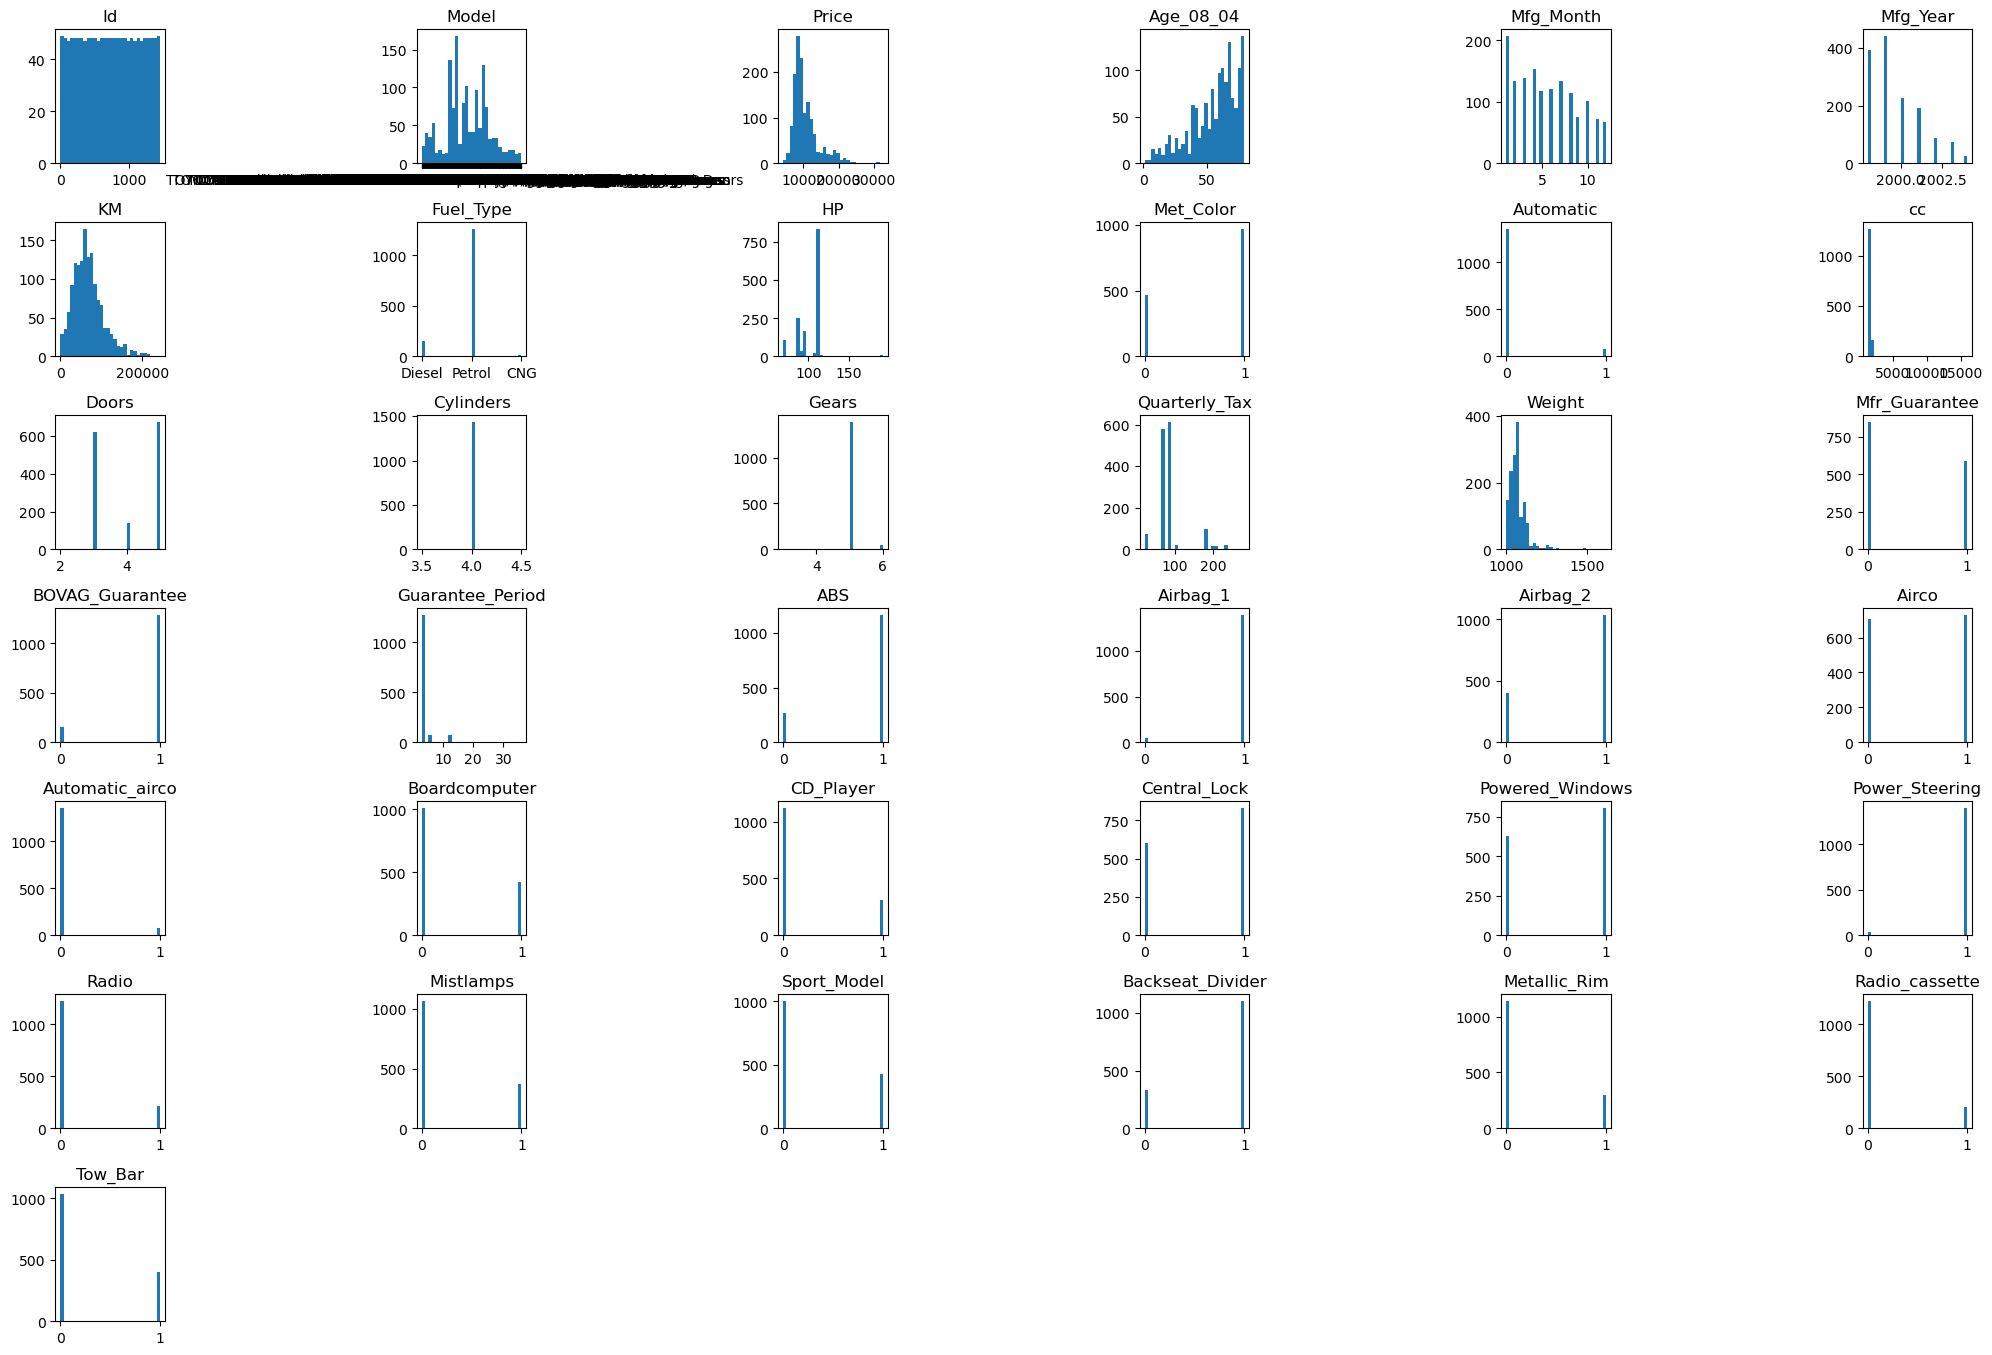

In [155]:
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,25))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=30)
    axes[i].set_title(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


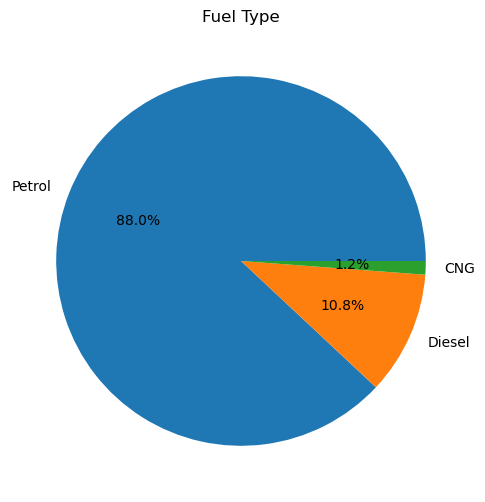

In [156]:
fuel_type_counts = df['Fuel_Type'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%')

plt.title('Fuel Type')
plt.show()

In [157]:
df.nunique()

Id                  1436
Model                372
Price                236
Age_08_04             77
Mfg_Month             12
Mfg_Year               7
KM                  1263
Fuel_Type              3
HP                    12
Met_Color              2
Automatic              2
cc                    13
Doors                  4
Cylinders              1
Gears                  4
Quarterly_Tax         13
Weight                59
Mfr_Guarantee          2
BOVAG_Guarantee        2
Guarantee_Period       9
ABS                    2
Airbag_1               2
Airbag_2               2
Airco                  2
Automatic_airco        2
Boardcomputer          2
CD_Player              2
Central_Lock           2
Powered_Windows        2
Power_Steering         2
Radio                  2
Mistlamps              2
Sport_Model            2
Backseat_Divider       2
Metallic_Rim           2
Radio_cassette         2
Tow_Bar                2
dtype: int64

In [158]:
encoder = OneHotEncoder(sparse_output=False).set_output(transform=('pandas'))
cat_encode = encoder.fit_transform(df[['Fuel_Type']])
cat_encode

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1431,0.0,0.0,1.0
1432,0.0,0.0,1.0
1433,0.0,0.0,1.0
1434,0.0,0.0,1.0


In [159]:
df1 = pd.concat([df,cat_encode], axis=1)
df1.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,0,0,0,1,0,0,0,0.0,1.0,0.0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,0,0,1,0,0,0,0.0,1.0,0.0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,0,1,0,0,0,0.0,1.0,0.0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,0,1,0,0,0,0.0,1.0,0.0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,0,1,0,1,0,0,0,0.0,1.0,0.0


In [160]:
df1.drop(['Fuel_Type'], axis=1, inplace=True)


In [161]:
corelation_matrix = df1[['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
plt.figure(figsize=(12,8))
sns.heatmap(corelation_matrix, annot=True, cmap='coolwarm',fmt='.2f' , lw = .5)

plt.title('Corelation_matirx Heatmap')
plt.show()
          

ValueError: could not convert string to float: 'TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors'

<Figure size 1200x800 with 0 Axes>

In [169]:
df1.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol'],
      dtype='object')

In [171]:
X = df1[['Age_08_04', 'KM', 'HP', 'Met_Color', 'cc', 'Doors', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']]
y = df1[['Price']]

In [173]:
X.shape

(1436, 9)

In [175]:
#Dataset Spliting
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [177]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predicted = lr.predict(X_test)


In [179]:
print(X_test.shape, predicted.shape)

(288, 9) (288, 1)


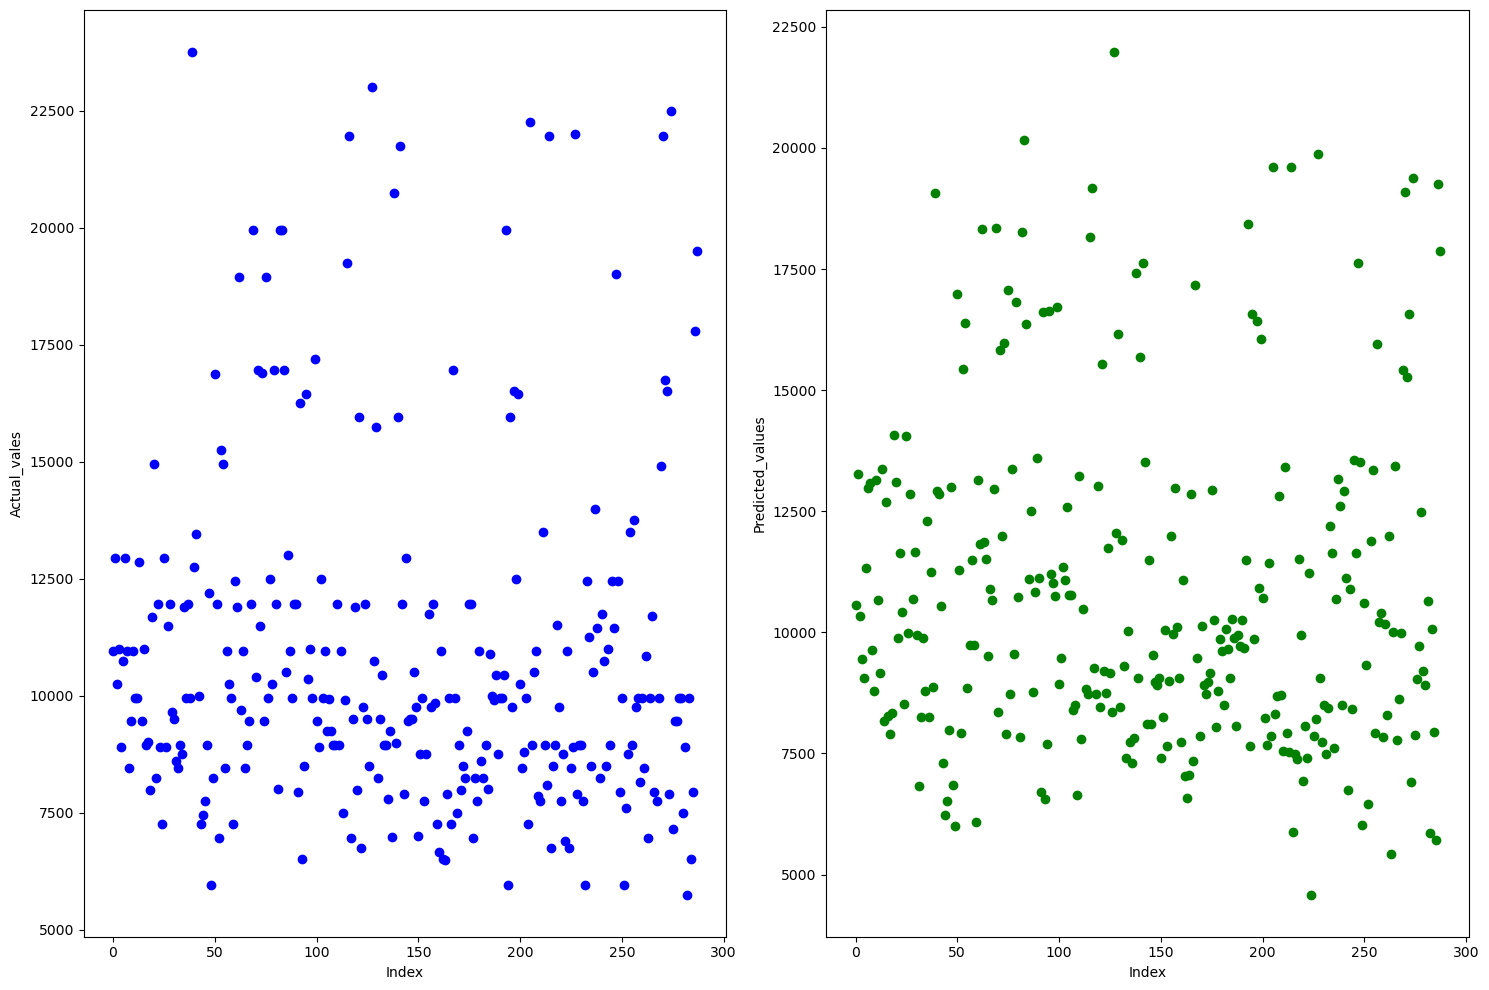

In [181]:
fig, axes = plt.subplots(1,2,figsize=(15,10))

#plotting actual values
axes[0].scatter(range(len(y_test)), y_test, c= 'blue')
axes[0].set_label('Actual_values')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Actual_vales')

#plotting predicted values

axes[1].scatter(range(len(predicted)), predicted, c='green')
axes[1].set_label('predicted_values')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Predicted_values')

plt.tight_layout()
plt.show()


In [183]:
#Calculating Metrics

mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test,predicted)
r2_score = metrics.r2_score(y_test, predicted)

In [185]:
print(mae,mse,r2_score)

976.5638122303228 1555215.3098427998 0.8824492255475807


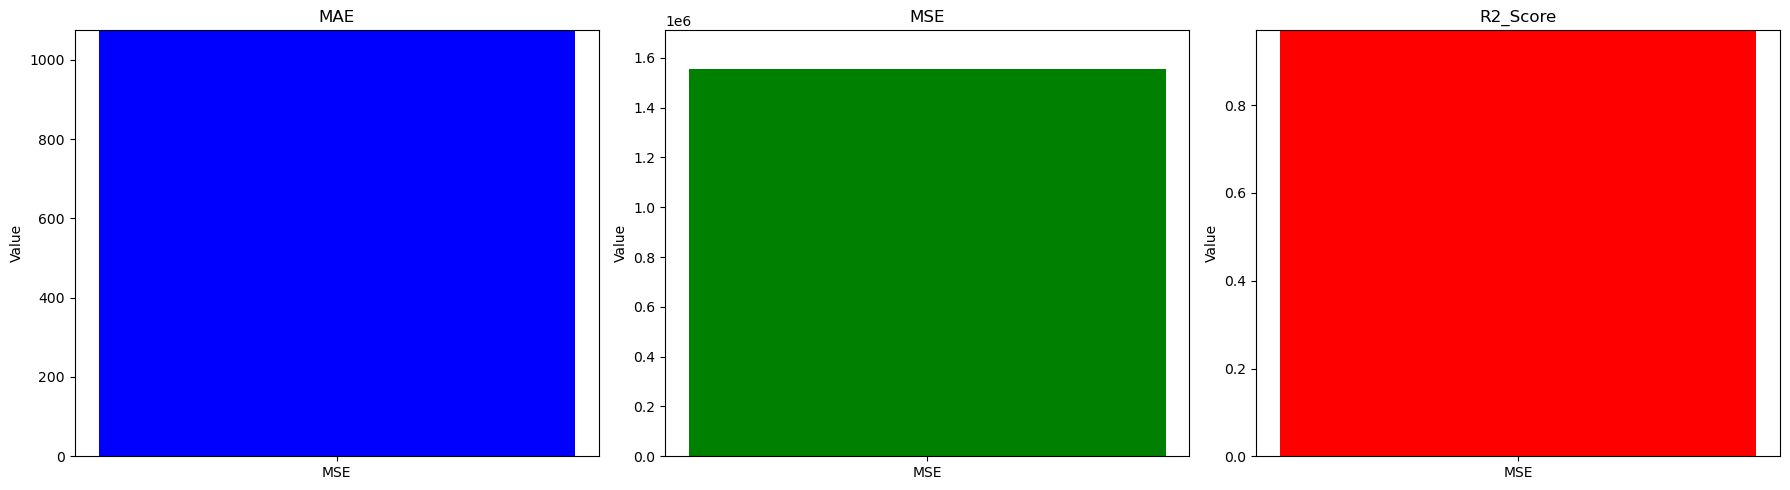

In [187]:
#preparing data for plotting
metrics_values = [mae, mse, r2_score]
metrics_names = ['MAE', 'MSE', 'R2_Score']

fig, axs = plt.subplots(1,3, figsize=(18,5))

#ploting each metrics in its subplot in its own y-axis

for i, ax in enumerate(axs):
    ax.bar(metrics_names[1], metrics_values[1], color=['blue', 'green', 'red'][i])
    ax.set_title(metrics_names[i])
    ax.set_ylabel('Value')
    ax.set_ylim(0, metrics_values[i]* 1.1)

plt.tight_layout()
plt.show()
           
